<a href="https://colab.research.google.com/github/JamieSano/BI---Business-Sales-Analysis-with-Forecasting/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_palette("RdBu")

In [ ]:
# read data set
data = pd.read_excel("/content/Coffee Shop Sales.xlsx")

In [ ]:
data.head()


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,3284,2023-01-07,06:27:23,2,5,San Rafael,64,46.4,Flavours,Regular syrup,Hazelnut syrup
1,3321,2023-01-07,07:44:17,1,5,San Rafael,63,46.4,Flavours,Regular syrup,Carmel syrup
2,3348,2023-01-07,08:09:37,1,8,Burgos,65,46.4,Flavours,Sugar free syrup,Sugar Free Vanilla syrup
3,3355,2023-01-07,08:18:07,1,5,San Rafael,65,46.4,Flavours,Sugar free syrup,Sugar Free Vanilla syrup
4,3361,2023-01-07,08:20:30,1,5,San Rafael,64,46.4,Flavours,Regular syrup,Hazelnut syrup


In [ ]:
data.shape


(149116, 11)

In [ ]:
data.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [ ]:
data.duplicated().any()


False

In [ ]:
# 1 - create new data frame with number of unique value in each column
columnValue = data.nunique().reset_index()

# 2 - rename column name
columnValue.rename(columns = {"index" : "Column_name", 0 : "Unique Values"}, inplace = True)

# 3 - see columns and number of unique values of each
columnValue

,Column_name,Unique Values
0,transaction_id,149116
1,transaction_date,181
2,transaction_time,25762
3,transaction_qty,6
4,store_id,3
5,store_location,3
6,product_id,80
7,unit_price,40
8,product_category,9
9,product_type,29


In [ ]:
# See quick info of numeric data

data.describe()


,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,195.804391
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,46.400000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,145.000000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,174.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,217.500000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,2610.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,153.481484


In [ ]:
# see quick info of categorical data

data.describe(include = object)

,transaction_time,store_location,product_category,product_type,product_detail
count,149116,149116,149116,149116,149116
unique,25762,3,9,29,80
top,09:31:15,Burgos,Coffee,Brewed Chai tea,Chocolate Croissant
freq,41,50735,58416,17183,3076


In [ ]:
data.drop(columns = ["transaction_id", "store_id", "product_id"], inplace = True)

In [ ]:
# create function to visualized categorical column using count plot
def count_plot(x_axis = None, y_axis = None, hue = None, rotation = 0, top = None):
    if x_axis: # if we neet to visualized in x-axis
        order = data[x_axis].value_counts().iloc[:top].index

    else : # if we neet to visualized in y-axis
        order = data[y_axis].value_counts().iloc[:top].index

    graph = sns.countplot(x = x_axis, y = y_axis, data = data, hue = hue, order = order, palette = "RdBu")
    for container in graph.containers:
        graph.bar_label(container)


    plt.xticks(rotation = rotation)
    plt.show()

In [ ]:
# create function that visualized categorical column using pie plot

def pie_plot(column_name, explodeIndex = None):
    """
    1) input : column name, column data type must be object or categorical
    2) explodeIndex, is the index i need to explode it
    3) output : circle chart that shows size of each unique values and percentage
    """
    # Create explode list with zeros of size equal to the number of unique values
    explodeList = [0] * data[column_name].nunique()

    # Check and set explodeIndex value
    if explodeIndex is not None:
        explodeList[explodeIndex] = 0.1

    # Create pie plot
    plt.pie(data[column_name].value_counts(), labels = data[column_name].value_counts().index, shadow = True, autopct = "%1.1f%%",  explode = explodeList)
    plt.show()


In [ ]:
# see unique value

data["transaction_date"].unique()[:25]

<DatetimeArray>
['2023-01-07 00:00:00', '2023-01-08 00:00:00', '2023-01-09 00:00:00',
 '2023-01-10 00:00:00', '2023-01-11 00:00:00', '2023-01-12 00:00:00',
 '2023-01-13 00:00:00', '2023-01-14 00:00:00', '2023-01-15 00:00:00',
 '2023-01-16 00:00:00', '2023-01-17 00:00:00', '2023-01-18 00:00:00',
 '2023-01-19 00:00:00', '2023-01-20 00:00:00', '2023-01-21 00:00:00',
 '2023-01-22 00:00:00', '2023-01-23 00:00:00', '2023-01-24 00:00:00',
 '2023-01-25 00:00:00', '2023-01-26 00:00:00', '2023-01-27 00:00:00',
 '2023-01-30 00:00:00', '2023-01-31 00:00:00', '2023-02-07 00:00:00',
 '2023-02-08 00:00:00']
Length: 25, dtype: datetime64[ns]

In [ ]:
# add new column year
data["year"] = data["transaction_date"].dt.year

# add new column month
data["month"] = data["transaction_date"].dt.month_name()

# add new column day
data["day"] = data["transaction_date"].dt.day_name()

In [ ]:
# see unique values of year column

data["year"].unique()

array([2023], dtype=int32)

In [ ]:
# see unique values of month column

data["month"].unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

<ipython-input-22-831854b38446>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = x_axis, y = y_axis, data = data, hue = hue, order = order, palette = "RdBu")


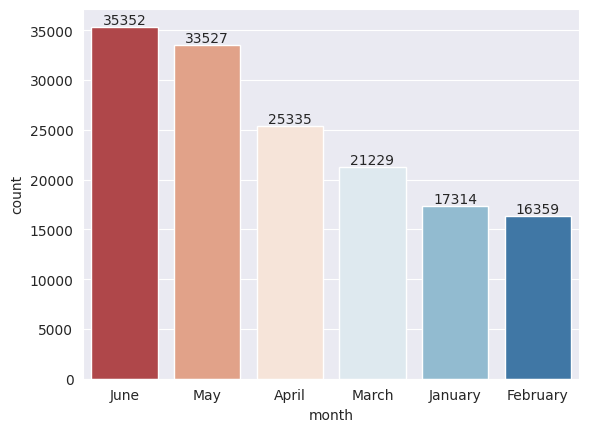

In [ ]:
# see number of transaction in each month

count_plot(x_axis = "month") # call function i create it in cell 12


In [ ]:
# Most sales within a six-month period
data["day"].unique()


array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

<ipython-input-22-831854b38446>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = x_axis, y = y_axis, data = data, hue = hue, order = order, palette = "RdBu")


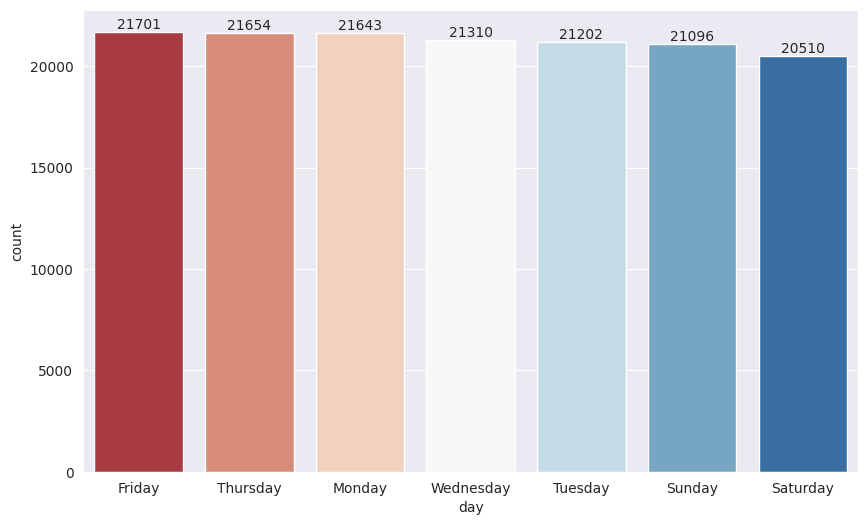

In [ ]:
# see top 5 day of transaction

# set figure size
plt.figure(figsize = (10,6))

# call function i create it in cell 12
count_plot(x_axis = "day")

In [ ]:
# now i will drop  "transaction_date" column

data.drop(columns = "transaction_date", inplace = True)

In [ ]:
# see unique values

data["transaction_time"].unique()[:50]

array([datetime.time(6, 27, 23), datetime.time(7, 44, 17),
       datetime.time(8, 9, 37), datetime.time(8, 18, 7),
       datetime.time(8, 20, 30), datetime.time(8, 32, 16),
       datetime.time(8, 35, 18), datetime.time(8, 35, 35),
       datetime.time(8, 36, 17), datetime.time(8, 46, 10),
       datetime.time(8, 49, 16), datetime.time(8, 59, 9),
       datetime.time(9, 5, 19), datetime.time(9, 10, 6),
       datetime.time(9, 19, 48), datetime.time(10, 3),
       datetime.time(10, 14, 20), datetime.time(10, 25, 49),
       datetime.time(10, 35, 38), datetime.time(10, 44, 3),
       datetime.time(10, 47, 22), datetime.time(10, 52, 50),
       datetime.time(10, 55, 25), datetime.time(10, 56, 5),
       datetime.time(11, 0, 3), datetime.time(18, 6, 25),
       datetime.time(7, 12, 48), datetime.time(7, 28, 36),
       datetime.time(7, 30, 17), datetime.time(7, 37, 12),
       datetime.time(8, 3, 13), datetime.time(8, 8, 17),
       datetime.time(8, 57, 11), datetime.time(9, 10, 50),
   

In [ ]:
# add new column hour

data["hour"] = data["transaction_time"].apply(lambda x : x.hour)
sns.kdeplot(data["hour"])
plt.show()

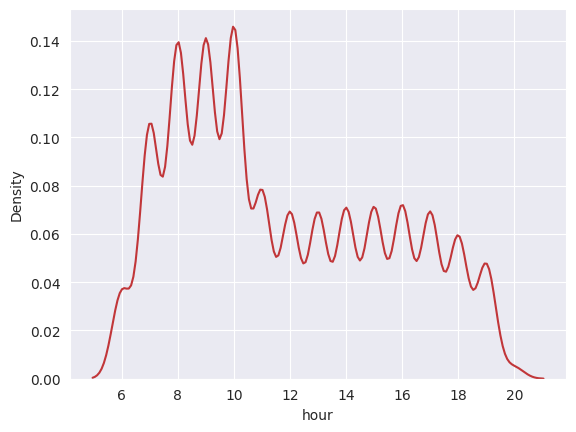

In [ ]:
# see distribution

sns.kdeplot(data["hour"])
plt.show()

In [ ]:
# drop "transaction_date" column

data.drop(columns = "transaction_time", inplace = True)

In [ ]:
data["transaction_qty"].unique()

array([2, 1, 3, 4, 6, 8])

<ipython-input-22-831854b38446>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = x_axis, y = y_axis, data = data, hue = hue, order = order, palette = "RdBu")


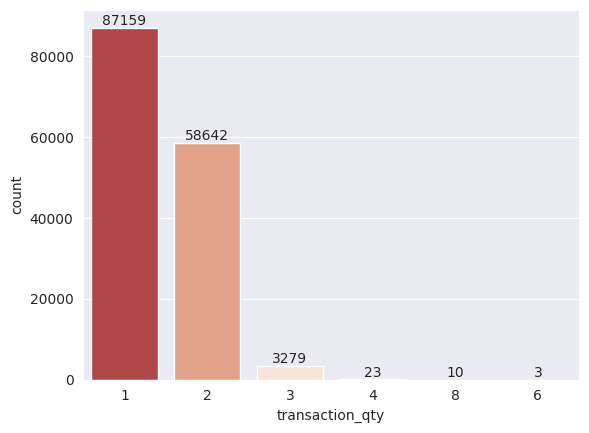

In [ ]:
# see number of sales quantity

count_plot(x_axis = "transaction_qty") # call function i create it in cell 12

In [ ]:
data["store_location"].unique()

array(['San Rafael', 'Burgos', 'San Mateo'], dtype=object)

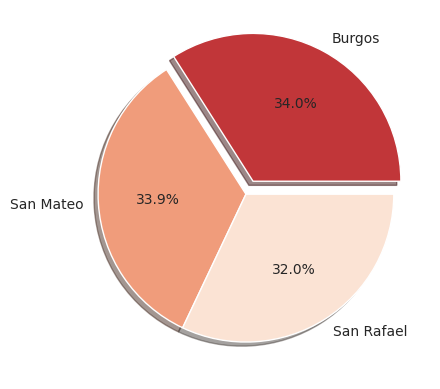

In [ ]:
#see number of sales in each store

pie_plot(column_name = "store_location", explodeIndex = 0)

In [ ]:
data["unit_price"].unique()

array([ 174.   ,  179.8  ,  261.   ,  116.   ,  246.5  ,  203.   ,
        147.9  ,  217.5  ,  145.   ,  275.5  ,  188.964,  232.   ,
        127.6  ,  142.1  ,   46.4  ,  447.5  , 1218.   , 1624.   ,
        371.2  , 1044.   ,  696.   ,  536.5  ,  580.   , 1186.1  ,
       1305.   ,  855.5  ,  440.8  ,  812.   ,  635.1  ,  773.14 ,
        870.   ,  254.04 ,  235.48 , 1145.5  ,  326.54 ,  272.02 ,
       2610.   , 1334.   ,  121.8  ,  153.7  ])

<Axes: ylabel='unit_price'>

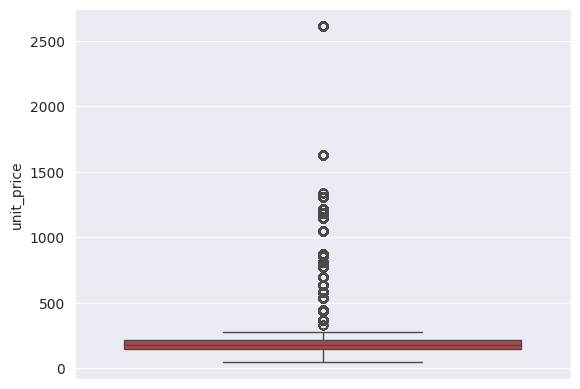

In [ ]:
# see 5 number summary to check outliers

sns.boxplot(y = "unit_price", data = data)

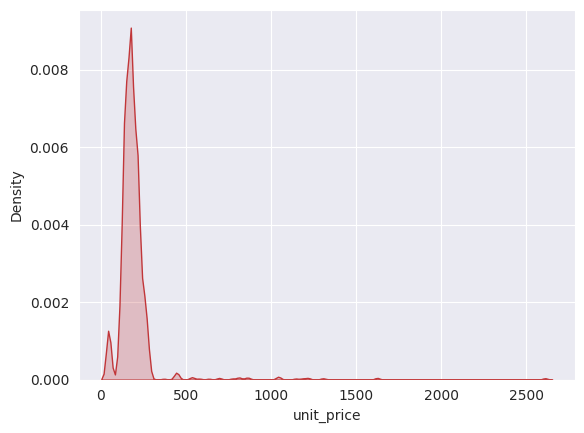

In [ ]:
# see distribution

sns.kdeplot(x = data["unit_price"], fill = True)
plt.show()

In [ ]:
# see unique values

data["product_category"].unique()

array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours',
       'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
      dtype=object)

<ipython-input-14-74937d3926b0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = x_axis, y = y_axis, data = data, hue = hue, order = order, palette = "RdBu")


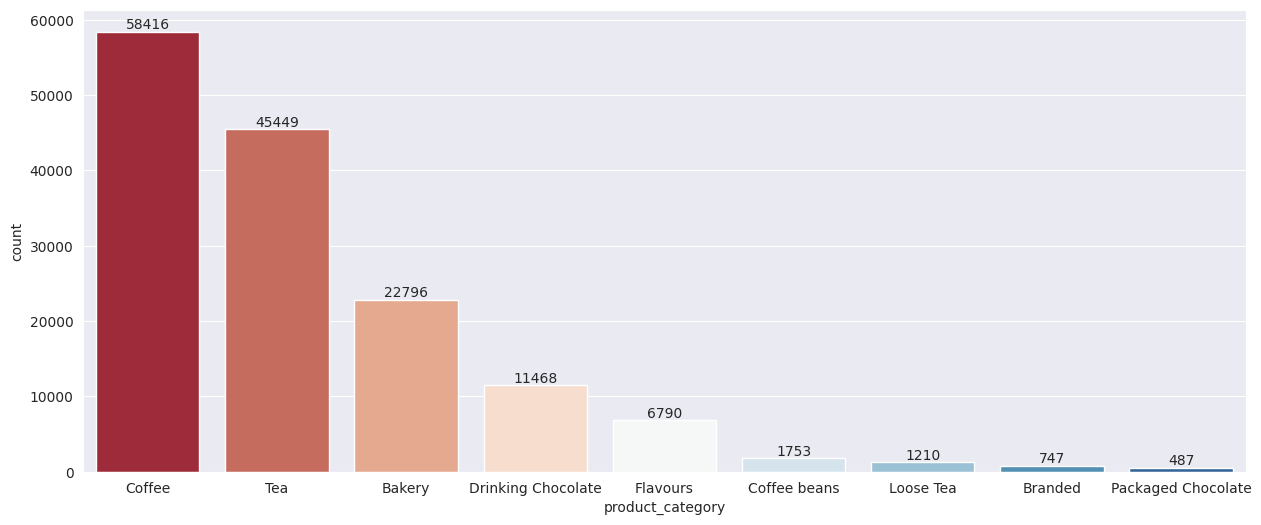

In [ ]:
# see most common category

# set figure size
plt.figure(figsize = (15,6))

# call function i create it in cell 12
count_plot(x_axis = "product_category")

In [ ]:
data["product_type"].unique()

array(['Gourmet brewed coffee', 'Brewed Chai tea', 'Hot chocolate',
       'Drip coffee', 'Scone', 'Barista Espresso', 'Brewed Black tea',
       'Brewed Green tea', 'Brewed herbal tea', 'Biscotti', 'Pastry',
       'Organic brewed coffee', 'Premium brewed coffee', 'Regular syrup',
       'Herbal tea', 'Gourmet Beans', 'Organic Beans', 'Sugar free syrup',
       'Drinking Chocolate', 'Premium Beans', 'Chai tea', 'Green beans',
       'Espresso Beans', 'Green tea', 'Organic Chocolate', 'Housewares',
       'Black tea', 'House blend Beans', 'Clothing'], dtype=object)

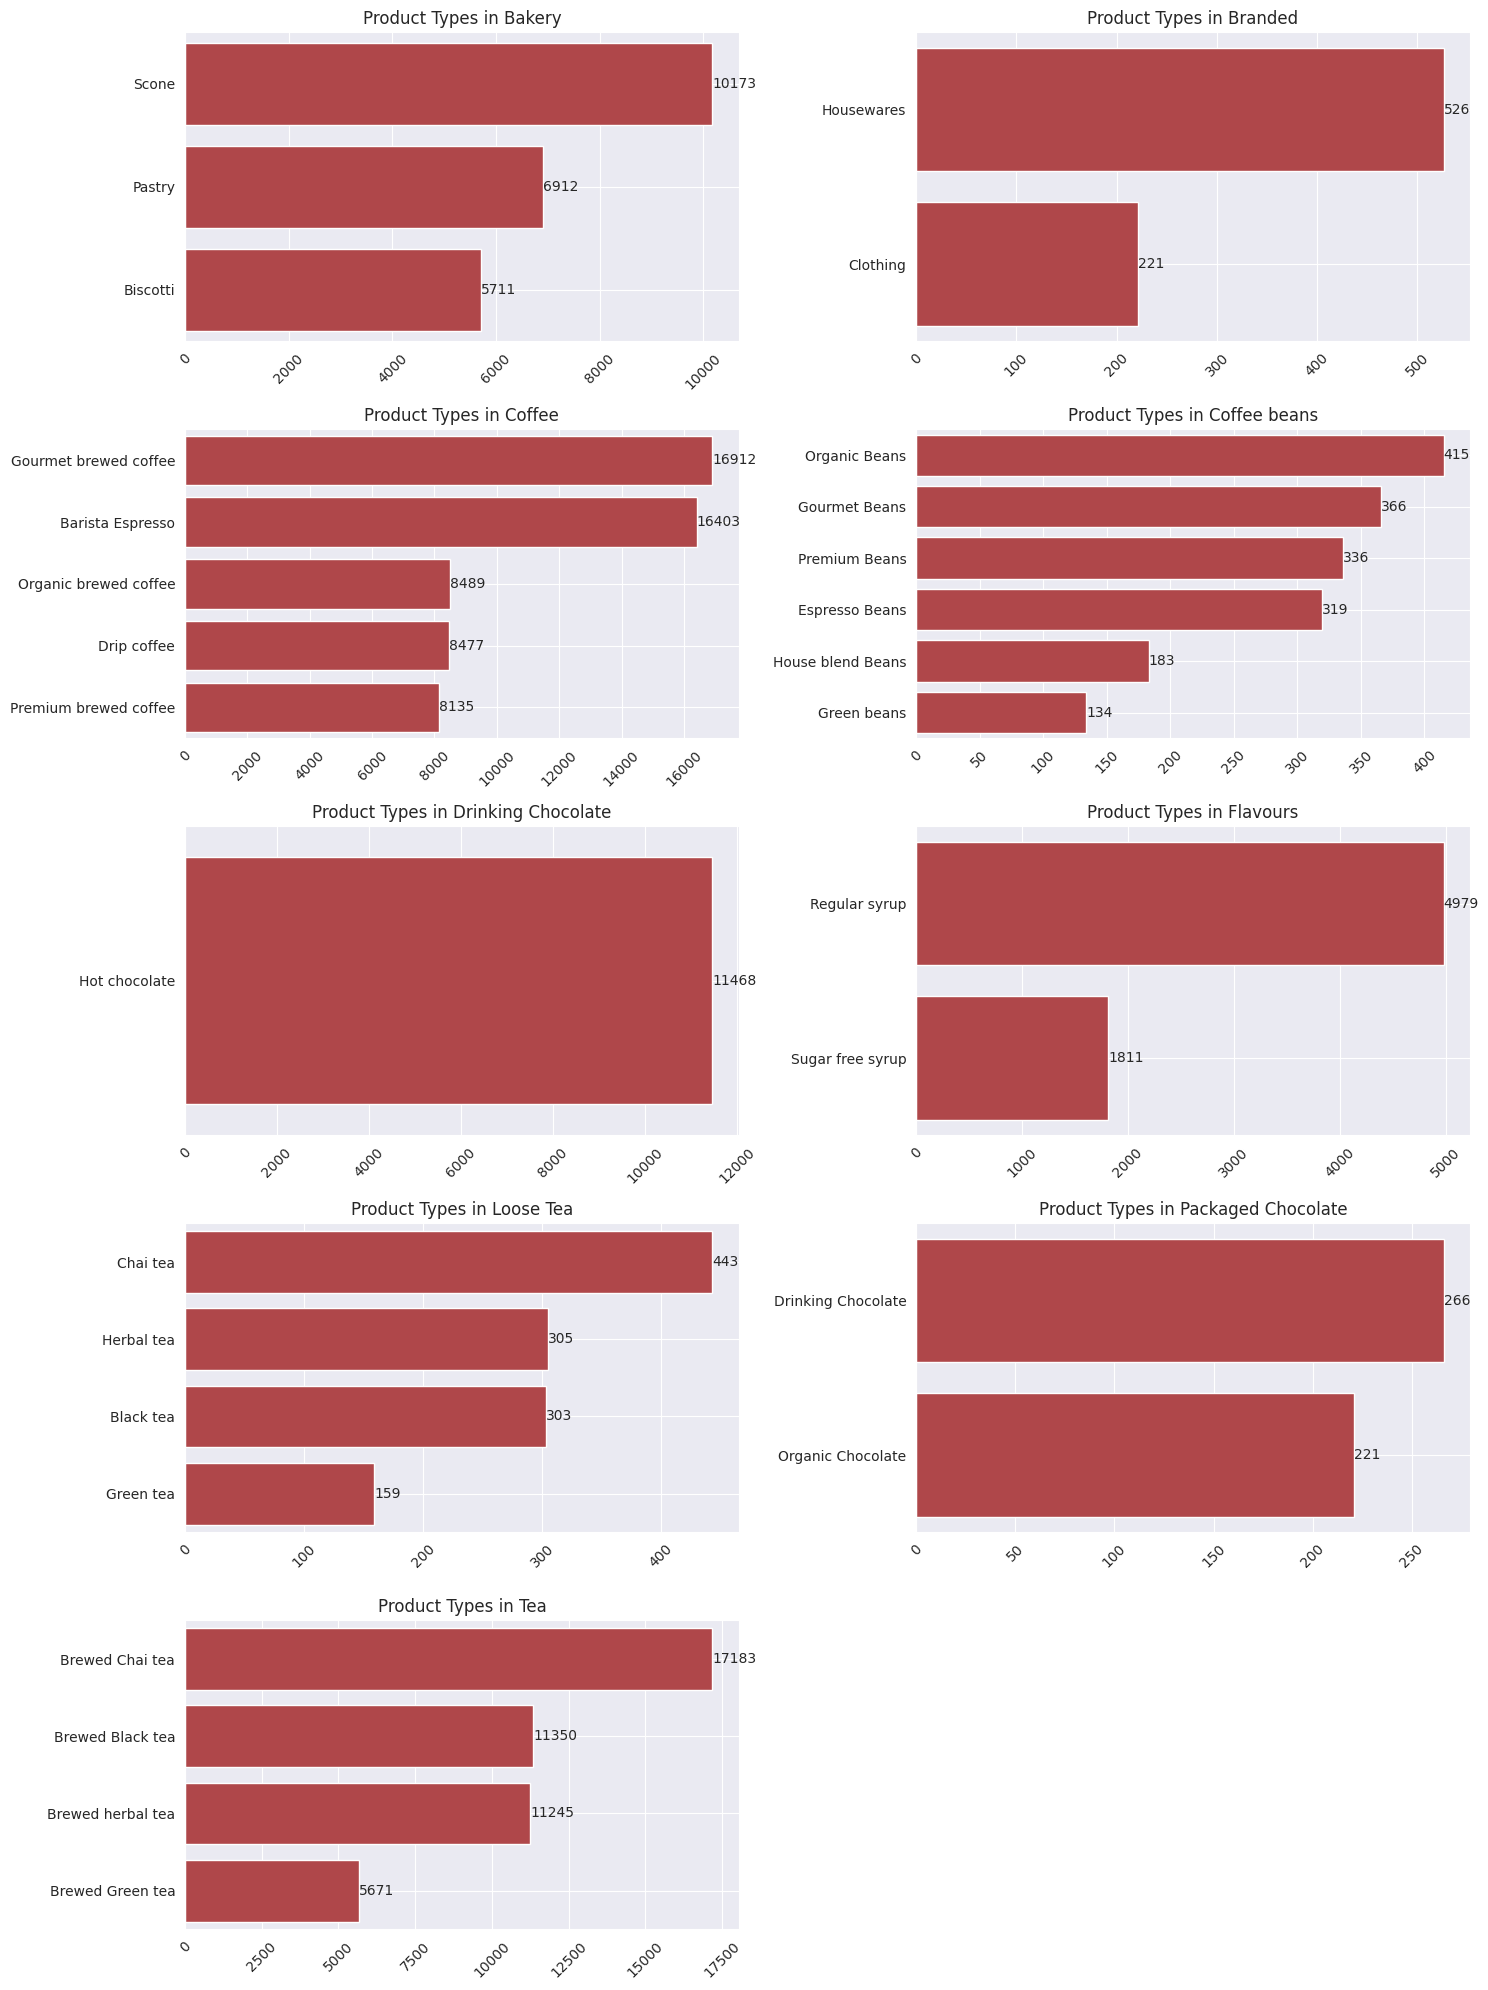

In [ ]:
# Assuming 'counts' is the DataFrame obtained from your groupby operation
counts = data.groupby(["product_category", "product_type"]).size().reset_index(name = "count")

# Get unique categories
categories = counts['product_category'].unique()

# Create subplots for each category in a 4x2 grid
fig, axes = plt.subplots(5, 2, figsize = (15, 20))

# Flatten the axes for easier iteration
axes = axes.flatten()

for i, category in enumerate(categories):
    # Filter data for each category
    subset = counts[counts['product_category'] == category]

    # Sort the data by 'count' column in descending order
    subset = subset.sort_values('count', ascending = False)

    # Create a bar plot for each category with sorted order
    sns.barplot(x = 'count', y = 'product_type', data = subset, ax = axes[i], order = subset['product_type'])
    axes[i].set_title(f'Product Types in {category}')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis = 'x', rotation = 45)
    axes[i].grid(True)

    # Adding bar labels
    for idx, bar in enumerate(axes[i].patches):
        axes[i].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, subset.iloc[idx]['count'], ha = 'left', va = 'center')

# Hide extra subplots if there are fewer categories than subplots
for j in range(len(categories), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
data["product_detail"].unique()


array(['Ethiopia Rg', 'Spicy Eye Opener Chai Lg', 'Dark chocolate Lg',
       'Our Old Time Diner Blend Sm', 'Oatmeal Scone',
       'Columbian Medium Roast Sm', 'Latte Rg', 'Dark chocolate Rg',
       'Spicy Eye Opener Chai Rg', 'Ethiopia Lg', 'Earl Grey Lg',
       'Ouro Brasileiro shot', 'Serenity Green Tea Lg',
       'Jumbo Savory Scone', 'Lemon Grass Rg',
       'Sustainably Grown Organic Lg', 'Hazelnut Biscotti', 'Cappuccino',
       'Lemon Grass Lg', 'Chocolate Chip Biscotti', 'Peppermint Lg',
       'Chocolate Croissant', 'Latte', 'Brazilian Rg', 'Brazilian Lg',
       'Columbian Medium Roast Rg', 'Morning Sunrise Chai Rg',
       'Morning Sunrise Chai Lg', 'Our Old Time Diner Blend Lg',
       'Sustainably Grown Organic Rg', 'Scottish Cream Scone ',
       'Peppermint Rg', 'English Breakfast Rg',
       'Our Old Time Diner Blend Rg', 'Serenity Green Tea Rg',
       'Brazilian Sm', 'Jamaican Coffee River Sm',
       'Jamaican Coffee River Lg', 'Ginger Biscotti',
       'Tradit

In [ ]:

data.drop(columns = "product_detail", inplace = True)

In [ ]:
# add new column revenue

data["Total revenue"] = data["transaction_qty"] * data["unit_price"]

In [ ]:
data.sample(5)

,transaction_qty,store_location,unit_price,product_category,product_type,year,month,day,hour,Total revenue
71776,1,San Mateo,145.000,Tea,Brewed Green tea,2023,April,Thursday,15,145.000
41334,1,San Rafael,217.500,Coffee,Premium brewed coffee,2023,March,Sunday,9,217.500
120565,1,San Rafael,145.000,Tea,Brewed herbal tea,2023,June,Wednesday,7,145.000
126913,1,San Mateo,188.964,Bakery,Scone,2023,June,Monday,9,188.964
96717,1,San Rafael,855.500,Coffee beans,Espresso Beans,2023,May,Tuesday,8,855.500


from matplotlib import pyplot as plt
_df_0['unit_price'].plot(kind='hist', bins=20, title='unit_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['hour'].plot(kind='hist', bins=20, title='hour')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Total revenue'].plot(kind='hist', bins=20, title='Total revenue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('store_location').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('product_category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('product_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('month').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='unit_price', y='hour', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='hour', y='Total revenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['transaction_qty']
  ys = series['unit_price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('transaction_qty', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('store_location')):
  _plot_series(series, series_name, i)
  fig.legend(title='store_location', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('transaction_qty')
_ = plt.ylabel('unit_price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['transaction_qty']
  ys = series['unit_price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('transaction_qty', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('product_category')):
  _plot_series(series, series_name, i)
  fig.legend(title='product_category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('transaction_qty')
_ = plt.ylabel('unit_price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['transaction_qty']
  ys = series['unit_price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('transaction_qty', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('product_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='product_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('transaction_qty')
_ = plt.ylabel('unit_price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['transaction_qty']
  ys = series['unit_price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('transaction_qty', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('month')):
  _plot_series(series, series_name, i)
  fig.legend(title='month', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('transaction_qty')
_ = plt.ylabel('unit_price')

from matplotlib import pyplot as plt
_df_13['unit_price'].plot(kind='line', figsize=(8, 4), title='unit_price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['hour'].plot(kind='line', figsize=(8, 4), title='hour')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Total revenue'].plot(kind='line', figsize=(8, 4), title='Total revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['product_category'].value_counts()
    for x_label, grp in _df_16.groupby('store_location')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('store_location')
_ = plt.ylabel('product_category')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['product_type'].value_counts()
    for x_label, grp in _df_17.groupby('product_category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('product_category')
_ = plt.ylabel('product_type')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['month'].value_counts()
    for x_label, grp in _df_18.groupby('product_type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('product_type')
_ = plt.ylabel('month')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['day'].value_counts()
    for x_label, grp in _df_19.groupby('month')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('month')
_ = plt.ylabel('day')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['store_location'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='unit_price', y='store_location', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['product_category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='unit_price', y='product_category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['product_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='unit_price', y='product_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['month'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='unit_price', y='month', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

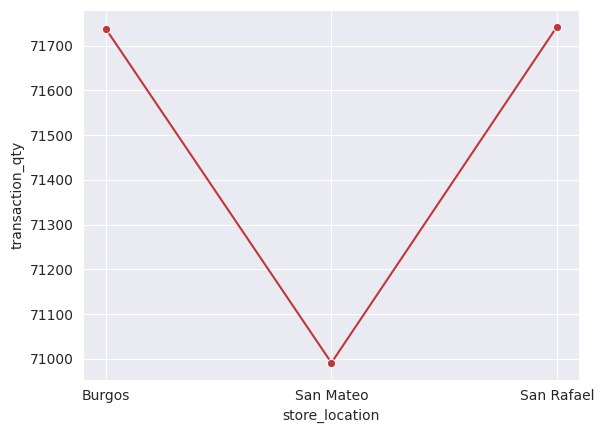

In [ ]:
# stores Vs transaction quantities

# Calculate sum of transaction quantities for each store_location
sum_transaction_qty = data.groupby("store_location")["transaction_qty"].sum().reset_index()

# create line plot
sns.lineplot(x = "store_location", y = "transaction_qty", data = sum_transaction_qty, marker = "o")
plt.show()

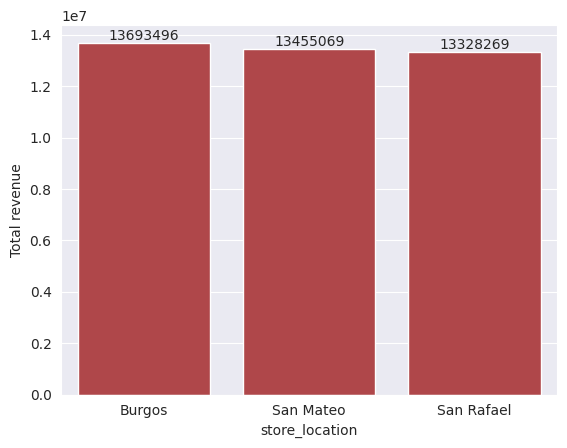

In [ ]:
# Stores Vs Total revenue

# Calculate total revenue for each store_location
revenue = data.groupby("store_location")["Total revenue"].sum().reset_index()

# create bar plot
ax = sns.barplot(x = "store_location", y = "Total revenue", data = revenue)

# Adding labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',
                xytext = (0, 5), textcoords = 'offset points')

plt.show()

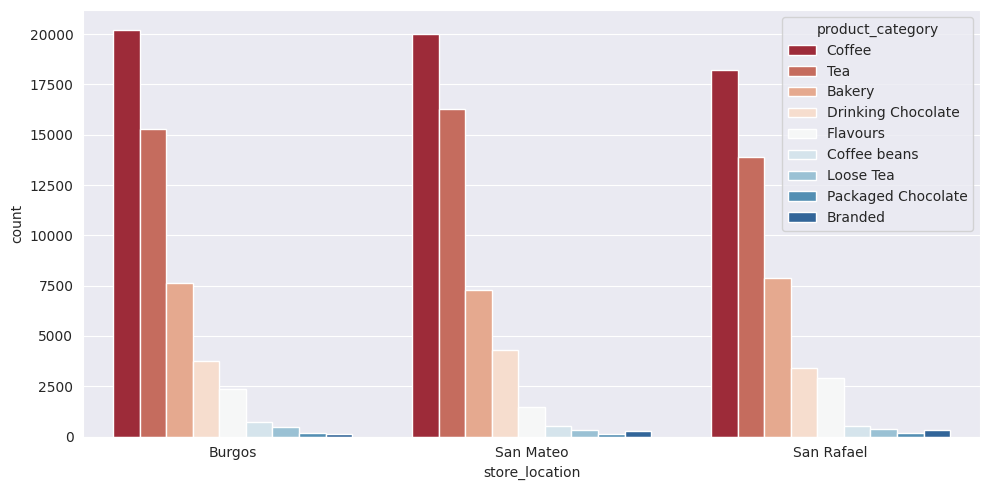

In [ ]:
# Stores VS product categories

# Calculate number of product categories at each store location
popular_products = data.groupby('store_location')[['product_category']].value_counts().reset_index(name='count')

# set figure size
plt.figure(figsize=(10, 5))

# Create a bar plot
sns.barplot(x = 'store_location', y = 'count', hue = 'product_category', data = popular_products, palette = "RdBu")

plt.tight_layout()
plt.show()

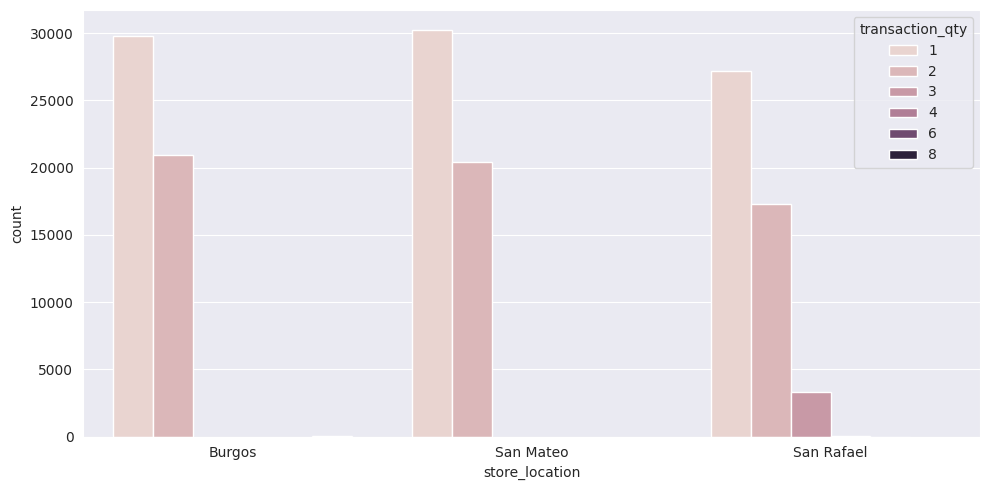

In [ ]:
# Stores VS Most transaction_qty

# grouped 'store_location' and 'transaction_qty' as columns
grouped_data = data.groupby("store_location")["transaction_qty"].value_counts().reset_index(name = "count")

# set figure size
plt.figure(figsize=(10, 5))

# Create bar plot
sns.barplot(x = "store_location", y = "count", hue = "transaction_qty", data = grouped_data)

plt.tight_layout()
plt.show()

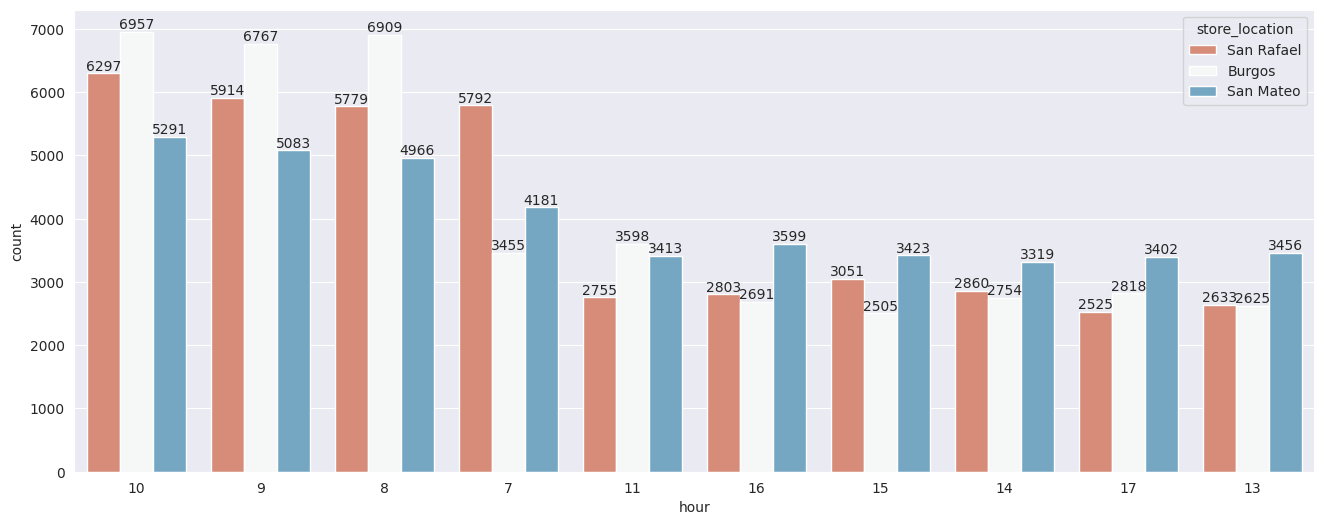

In [ ]:
# Stores VS Hour sales

# set figure size
plt.figure(figsize=(16, 6))

# call function i create it in cell 12
count_plot(x_axis = "hour", hue = "store_location", top = 10)

<ipython-input-56-a86d292e2950>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "product_type", y = "revenue", data = category_revenue, palette = "RdBu")


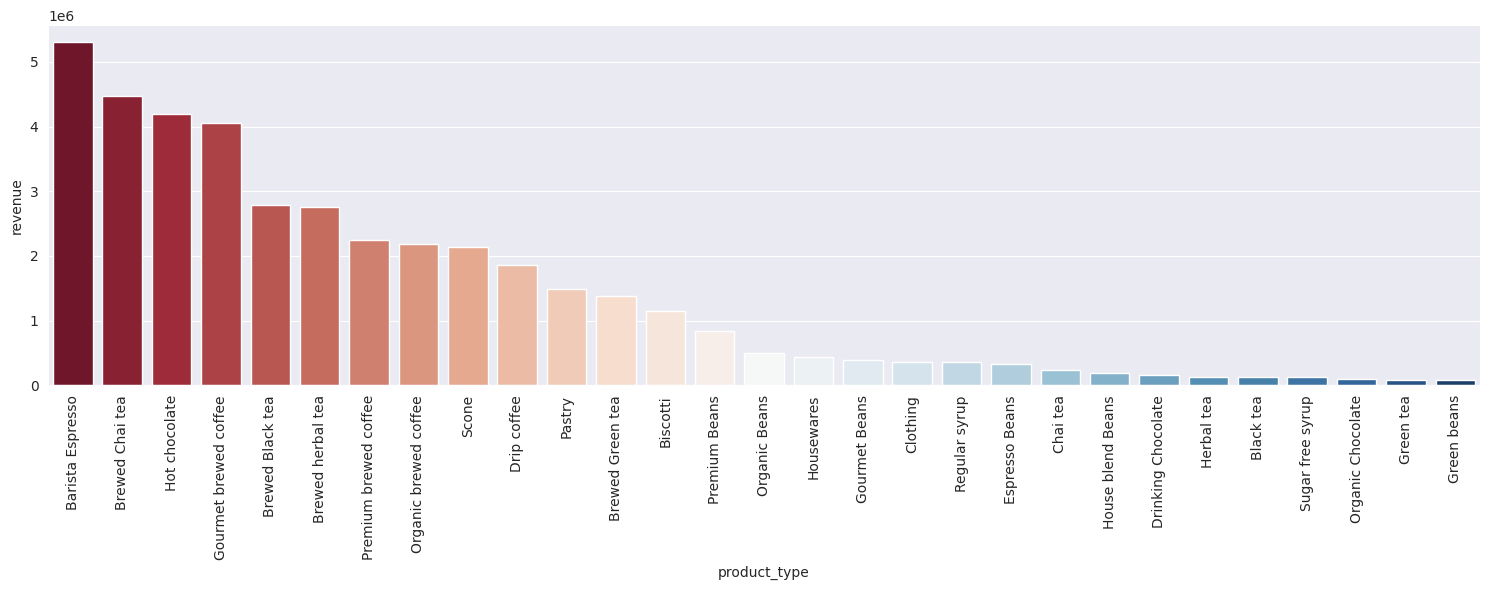

In [ ]:
# Category VS Total revenue

# grouped product_type' and 'Total revenue'
category_revenue = data.groupby("product_type")["Total revenue"].sum().reset_index(name = "revenue")

# sort category by revenue
category_revenue = category_revenue.sort_values(by = 'revenue', ascending = False)

# set figure size
plt.figure(figsize = (15,6))

# create bar plot
sns.barplot(x = "product_type", y = "revenue", data = category_revenue, palette = "RdBu")

# set x-axis rotation
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

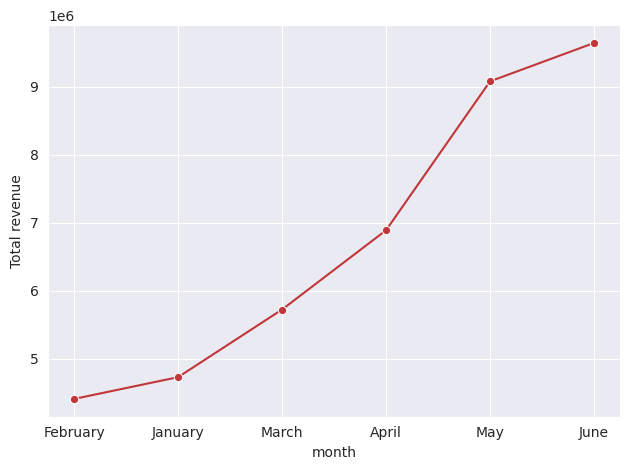

In [ ]:
# Month VS revenue

# Grouping by month and summing the revenue
monthly_revenue  = data.groupby("month")["Total revenue"].sum().reset_index().sort_values(by = "Total revenue")

# create line plot
sns.lineplot(x = "month", y = "Total revenue", data = monthly_revenue , marker = "o")

plt.tight_layout()
plt.show()

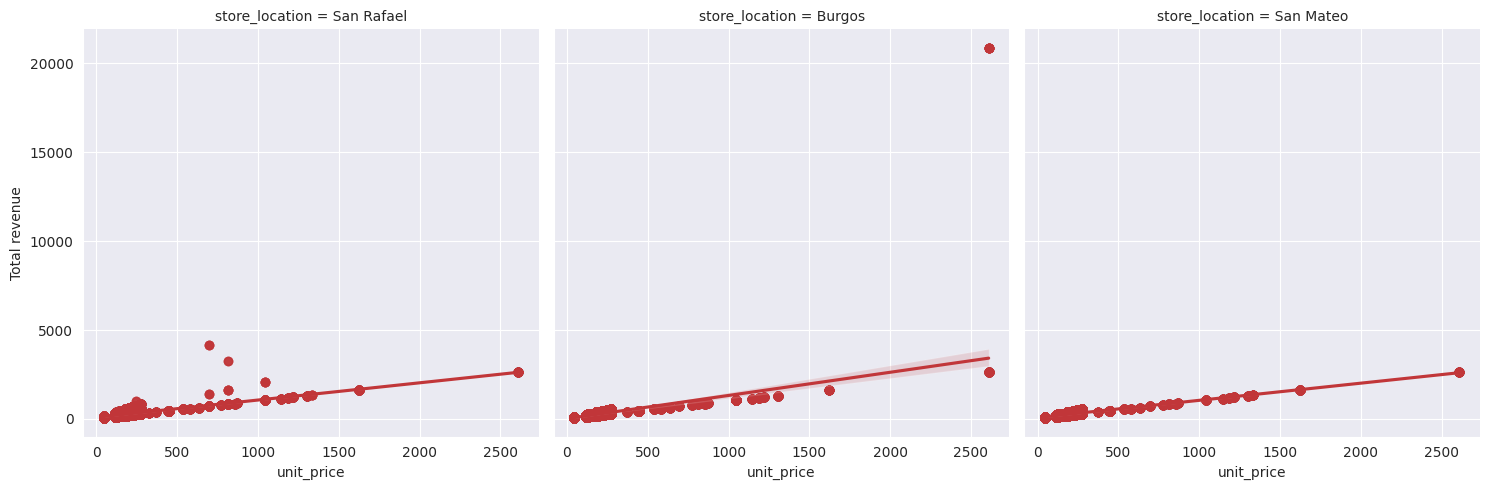

In [ ]:
sns.lmplot(data, x = 'unit_price', y = 'Total revenue', col = 'store_location')

In [ ]:
data['Total Sales'] = data['transaction_qty']*data['unit_price']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn import tree

In [ ]:
X = data[['transaction_qty','unit_price']] #features
y = data['Total revenue'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
y_predicted

array([619.84785441, 326.98319038, 173.03054794, ..., 173.03054794,
       330.44215506, 533.37373739])

In [ ]:
model.score(X_test,y_test)

0.7539222164540047

In [ ]:
# Random Forest Model
X = data[['transaction_qty','unit_price']] #features
y = data['Total revenue'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model = RandomForestRegressor (n_estimators = 5)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

In [ ]:
model.score(X_test,y_test)

0.9999778513578205

In [ ]:
#Decision Tree Model
model = tree.DecisionTreeRegressor()
X = data[['transaction_qty','unit_price']] #features
y = data['Total revenue'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)

train_score
test_score

1.0

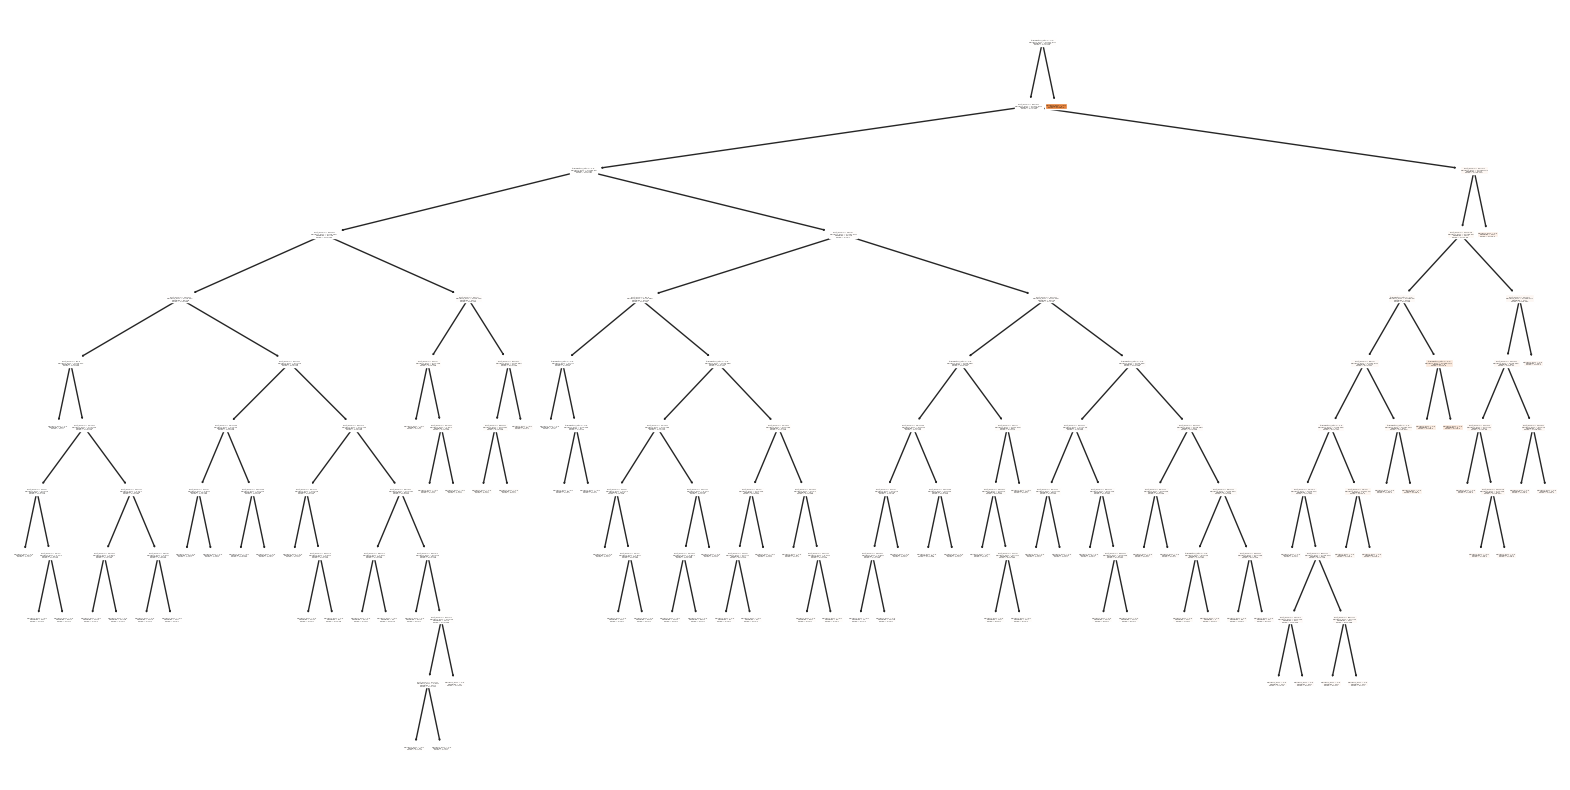

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()


<ipython-input-104-91bf704f9438>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


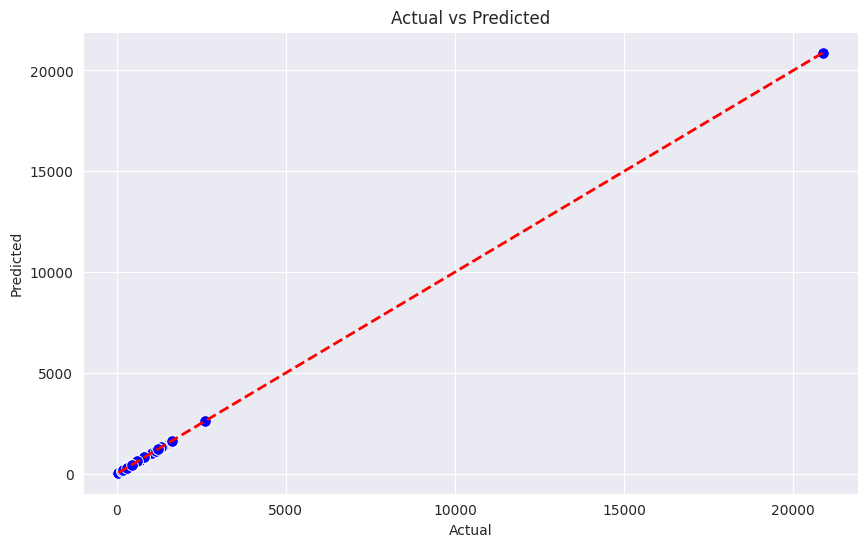

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_test_pred, color='blue', edgecolor='w', s=70)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

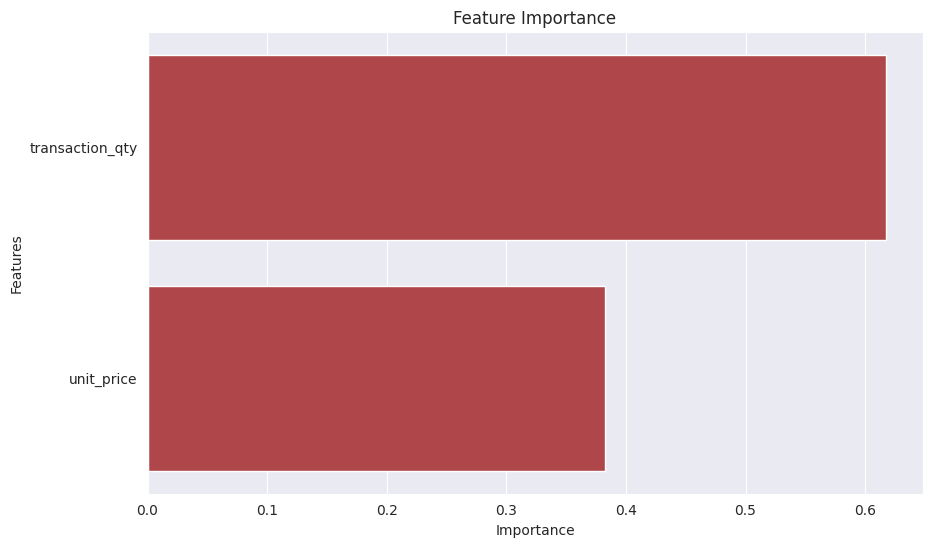

In [ ]:
importance = model.feature_importances_
feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

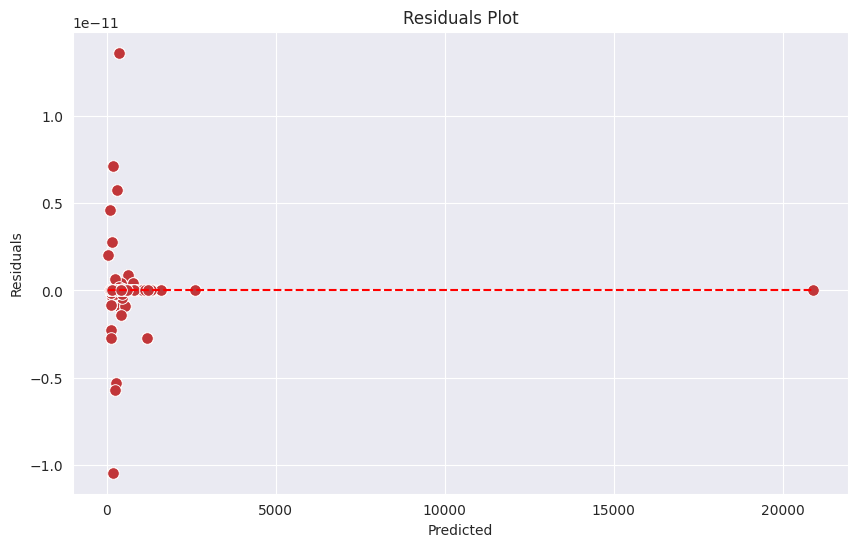

In [ ]:
residuals = y_test - y_test_pred

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test_pred, y=residuals, edgecolor='w', s=70)
plt.hlines(0, xmin=y_test_pred.min(), xmax=y_test_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [ ]:
model.score(X_test,y_test)

1.0

In [ ]:
#Scalling Data
X = data[['transaction_qty','unit_price']] #features
y = data['Total revenue'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = RandomForestRegressor(n_estimators = 9)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

In [ ]:
model.score(X_test,y_test)

0.9999882148138692

In [ ]:
#KNeighbour Model
X = data[['transaction_qty','unit_price']] #features
y = data['Total revenue'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

In [ ]:
model.score(X_test,y_test)

0.9996770651154129